## Introduction

In [ ]:
#........

##### External libraries:

In [30]:
import csv
import time
import calendar
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date
from datetime import datetime
from pandas.core.frame import DataFrame
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

## Data read and cleaning

##### Data read:

In [34]:
# Links of rawdata
url1 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-01.csv?token=GHSAT0AAAAAAAAAHGMUFHRNQTID6IAZACGEY3CHMUQ"
url1d = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-01-second-detail.csv?token=GHSAT0AAAAAAAAAHGMXOQ5D4CFS74PXT4HYY3CIIUA"
url2 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-02-detail.csv?token=GHSAT0AAAAAAAAAHGMX6EUL3EU5AG7LLKUSY3CIBUA"  
# url3 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-03.csv?token=GHSAT0AAAAAAAAAHGMU75XPZFWAQ3EUPRYMY3CHNRQ"
# url4 = "https://github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/blob/main/src/resources/Participant-04.csv"
url5 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-05-detail.csv?token=GHSAT0AAAAAAAAAHGMUXE7OFOFHAG5DQMIWY3CHOFQ"
# url7 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-07.csv?token=GHSAT0AAAAAAAAAHGMVZGNPORTPLEWWQGJEY3CHORA"
# url8 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-08.csv?token=GHSAT0AAAAAAAAAHGMV2U5G6NYBIUDUQ63YY3CHO2Q"

# read data in:
p1 = pd.read_csv(url1)
p1d = pd.read_csv(url1d)
p2d = pd.read_csv(url2)
# p3 = pd.read_csv(url3)
# p4 = pd.read_csv(url4)
p5d = pd.read_csv(url5)
# p7 = pd.read_csv(url7)
# p8 = pd.read_csv(url8)

##### Data cleaning

In [41]:
## undetailed data:
def clean_undetailed_data(df):
    #change foramt to datetime
    df['Start'] = pd.to_datetime(df['Start'])
    #change the datetime format as yyyy-mm-dd
    df['Start'] = df['Start'].dt.strftime('%Y/%m/%d')
    #group by start time and count the steps
    day_data1 = df.groupby(['Start']).sum()
    # add index
    day_data1 = day_data1.reset_index(drop=False)
    #first change the data type to datetime
    day_data1['Start'] = pd.to_datetime(day_data1['Start'])
    #use resample to integrate the data into weekly
    week_data1 = day_data1.resample('W', on="Start").sum()
    #added numbers to record each week
    week_data1['weeks'] = range(len(week_data1))
    return week_data1

## Detailed data:
def clean_detailed_data(df):
    data = pd.DataFrame({"Date": df['Date'], "Count":df['Count']})
    # convert type of 'Date' to Datetimes type
    data['Date'] = pd.to_datetime(data['Date'])
    # keep data in 2022
    result = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2022-12-31')]
    return result

## undetailed:
data1 = clean_undetailed_data(p1)

## Detailed:
data1_detailed = clean_detailed_data(p1d)
data2 = clean_detailed_data(p2d)
data5 = clean_detailed_data(p5d)


## Subquestion:

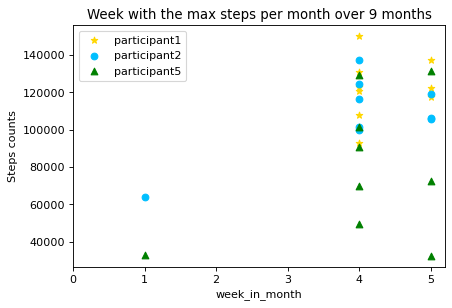

In [44]:
## Audrey:
def weekly_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    # group data by date
    per_day_data =  df.groupby(['Date']).sum()
    # convert data seriers index to data column
    per_day_data.reset_index(inplace=True)
    # group per_day data by week.
    weekly_data = per_day_data.resample('W', on="Date").sum()
    #convert data seriers index to data column
    weekly_data.reset_index(inplace=True)
    # extract month from date and save 'month' into month column.
    weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
    return weekly_data


def find_week_with_max_steps(df):
    # add_week_of_month
    df['week_in_month'] = df['Date'].apply(lambda x : x.day)/7
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    # find the week in month with max steps count 
    grouped = df.groupby(['month']).max(['Count'])
    grouped.reset_index(inplace=True)
    return grouped

data1_detailed_weekly = weekly_data(data1_detailed)
data2_weekly = weekly_data(data2)
data5_weekly = weekly_data(data5)

data1_detailed_final = find_week_with_max_steps(data1_detailed_weekly)
data2_final =find_week_with_max_steps(data2_weekly)
data5_final = find_week_with_max_steps(data5_weekly)

## visualization:
plt.figure(dpi=80)
plt.scatter(data1_detailed_final['week_in_month'], data1_detailed_final['Count'], marker='*', c ='gold')
plt.scatter(data2_final['week_in_month'], data2_final['Count'], marker='o', c = 'deepskyblue')
plt.scatter(data5_final['week_in_month'], data5_final['Count'], marker='^', c = 'green')
plt.xlabel("week_in_month")
plt.ylabel("Steps counts")
x = [0,1, 2, 3, 4, 5]
values = range(len(x))
plt.xticks(values,x)
plt.title("Week with the max steps per month over 9 months")
plt.legend(["participant1","participant2", "participant5"])